<a href="https://colab.research.google.com/github/soewal19/lnu_summer_school2024/blob/main/AIT12024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Add
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Step 1: Data Loading and Preprocessing
data = pd.read_csv('football_matches.csv')

# Extract relevant features
features = ['Opponent', 'Home/Away', 'Venue', 'Score']
data = data[features]

# Split Score column into HomeScore and AwayScore
data[['HomeScore', 'AwayScore']] = data['Score'].str.split('-', expand=True).astype(int)
data.drop(columns=['Score'], inplace=True)

# Encode categorical features
label_encoder = LabelEncoder()
data['Opponent'] = label_encoder.fit_transform(data['Opponent'])
data['Home/Away'] = label_encoder.fit_transform(data['Home/Away'])
data['Venue'] = label_encoder.fit_transform(data['Venue'])

# Split data into training and testing sets
X = data[['Opponent', 'Home/Away', 'Venue']].values
y = data[['HomeScore', 'AwayScore']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features (optional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Build and Train the ResNet Model
def residual_block(x, filters, kernel_size):
    x_shortcut = x
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dense(filters, kernel_size=kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dense(filters, kernel_size=kernel_size, padding='same')(x)
    x = Add()([x_shortcut, x])
    return x

# Build ResNet model
inputs = Input(shape=(3,))
x = Dense(64)(inputs)  # Adjust input shape based on your feature dimensions
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Add residual blocks
for _ in range(3):  # Number of residual blocks
    x = residual_block(x, 64, 3)

# Output layer
outputs = Dense(2, activation='linear')(x)  # Predict HomeScore and AwayScore

# Compile model
model = Model(inputs, outputs)
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae', 'mse', 'mape', tf.keras.metrics.RootMeanSquaredError()])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 3: Evaluate the Model and Make Predictions
# Evaluate model
loss, mae, mse, mape, rmse = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Metrics:')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Example prediction for a new match (adjust opponent and venue accordingly)
new_match = scaler.transform([[label_encoder.transform(['Germany'])[0], label_encoder.transform(['Away'])[0], label_encoder.transform(['Berlin'])[0]]])
predicted_scores = model.predict(new_match)
print(f'Predicted scores for Ukraine vs. Germany: {predicted_scores}')

# Plot training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Add
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('ukraine_result.csv')

# Extract relevant features
features = ['Opponent', 'Home/Away', 'Venue', 'Score']
data = data[features]

# Check for NaNs in Score column
nan_rows = data[data['Score'].isna()]
print("Rows with NaN in Score column:")
print(nan_rows)

# Drop rows with NaNs in Score column
data = data.dropna(subset=['Score'])

# Split Score column into HomeScore and AwayScore
score_split = data['Score'].str.split('-', expand=True)
data['HomeScore'] = score_split[0].astype(float)  # Convert to float to handle potential decimals
data['AwayScore'] = score_split[1].astype(float)

# Encode categorical features
label_encoder = LabelEncoder()
data['Opponent'] = label_encoder.fit_transform(data['Opponent'])
data['Home/Away'] = label_encoder.fit_transform(data['Home/Away'])
data['Venue'] = label_encoder.fit_transform(data['Venue'])

# Drop original Score column
data.drop(columns=['Score'], inplace=True)

# Split data into training and testing sets
X = data[['Opponent', 'Home/Away', 'Venue']].values
y = data[['HomeScore', 'AwayScore']].values

Rows with NaN in Score column:
     Opponent Home/Away       Venue Score
288  Portugal   Neutral  Copenhagen   NaN


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
def residual_block(x, filters):
    x_shortcut = x

    # BatchNormalization and Activation before Dense layers
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # First Dense layer
    x = Dense(filters, kernel_initializer='he_normal')(x)

    # BatchNormalization and Activation again
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Second Dense layer
    x = Dense(filters, kernel_initializer='he_normal')(x)

    # Add shortcut connection
    x = Add()([x_shortcut, x])

    return x

In [16]:
inputs = Input(shape=(3,))
x = Dense(64)(inputs)  # Adjust input shape based on your feature dimensions
x = BatchNormalization()(x)
x = Activation('relu')(x)

for _ in range(3):  # Number of residual blocks
    x = residual_block(x, 64)

# Output layer
outputs = Dense(2, activation='linear')(x) # Predict HomeScore and AwayScore

In [17]:
model = Model(inputs, outputs)
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae', 'mse', 'mape', tf.keras.metrics.RootMeanSquaredError()])

# Print model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 3)]                  0         []                            
                                                                                                  
 dense_4 (Dense)             (None, 64)                   256       ['input_5[0][0]']             
                                                                                                  
 batch_normalization_7 (Bat  (None, 64)                   256       ['dense_4[0][0]']             
 chNormalization)                                                                                 
                                                                                                  
 activation_7 (Activation)   (None, 64)                   0         ['batch_normalization_7[0]

In [18]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
8/8 [==============================] - 8s 67ms/step - loss: 4.4642 - mae: 1.5622 - mse: 4.4642 - mape: 533507936.0000 - root_mean_squared_error: 2.1129 - val_loss: 1.7205 - val_mae: 0.9156 - val_mse: 1.7205 - val_mape: 199222976.0000 - val_root_mean_squared_error: 1.3117
Epoch 2/50
8/8 [==============================] - 0s 14ms/step - loss: 2.8131 - mae: 1.3371 - mse: 2.8131 - mape: 570260480.0000 - root_mean_squared_error: 1.6772 - val_loss: 2.5531 - val_mae: 1.1334 - val_mse: 2.5531 - val_mape: 97172936.0000 - val_root_mean_squared_error: 1.5978
Epoch 3/50
8/8 [==============================] - 0s 13ms/step - loss: 1.7921 - mae: 1.0296 - mse: 1.7921 - mape: 304994464.0000 - root_mean_squared_error: 1.3387 - val_loss: 2.3847 - val_mae: 1.0748 - val_mse: 2.3847 - val_mape: 107833728.0000 - val_root_mean_squared_error: 1.5442
Epoch 4/50
8/8 [==============================] - 0s 16ms/step - loss: 1.7345 - mae: 1.0150 - mse: 1.7345 - mape: 374991328.0000 - root_mean_squared_err

In [19]:
loss, mae, mse, mape, rmse = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Metrics:')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Test Metrics:
Mean Absolute Error (MAE): 0.84
Mean Squared Error (MSE): 1.50
Mean Absolute Percentage Error (MAPE): 314409600.00%
Root Mean Squared Error (RMSE): 1.22


In [23]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assuming label_encoder and scaler are already defined and fitted on your training data

# Extend label_encoder classes with all possible categories
all_locations = ['Home', 'Away', 'Uzhhorod', 'Kiev', 'Istanbul', 'Minsk', 'Berlin', 'Zagreb']
label_encoder.classes_ = np.append(label_encoder.classes_, np.setdiff1d(all_locations, label_encoder.classes_))

# Transform new match data
new_match = scaler.transform([[label_encoder.transform(['Germany'])[0], label_encoder.transform(['Away'])[0], label_encoder.transform(['Berlin'])[0]]])

# Predict scores
predicted_scores = model.predict(new_match)
print(f'Predicted scores for Ukraine vs. Germany: {predicted_scores}')


1/1 [==============================] - 0s 217ms/step
Predicted scores for Ukraine vs. Germany: [[54.999657 22.779478]]


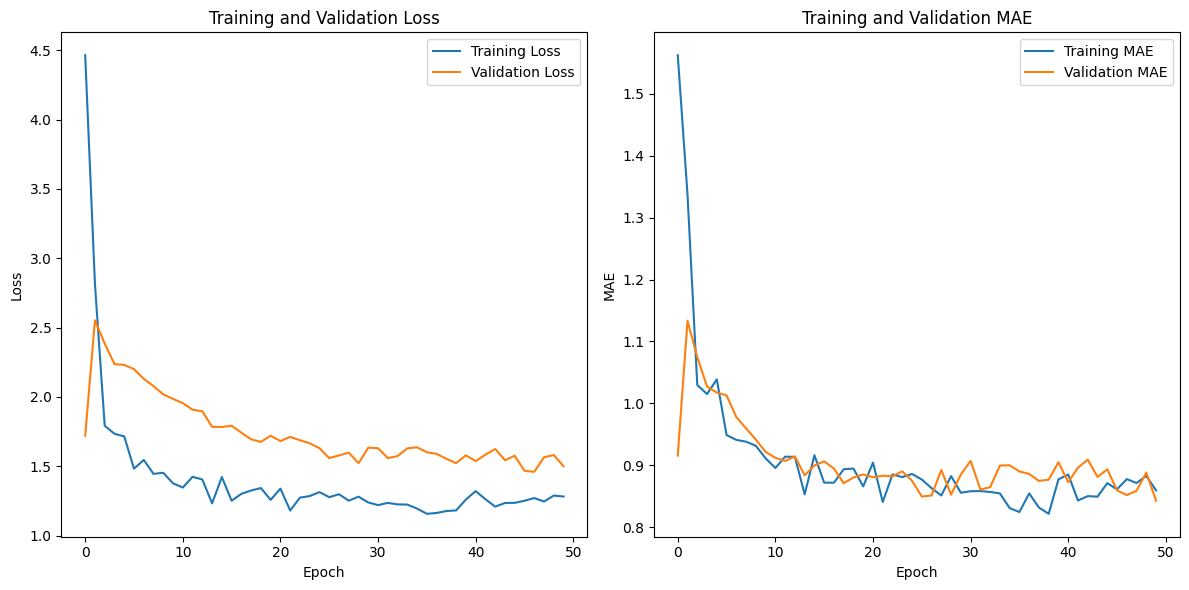

In [21]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()